<a href="https://colab.research.google.com/github/AlicePF43/Amigo-Secreto/blob/main/TelecomX_BR8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [113]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados_clientes = pd.read_json(url)

dados_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [114]:
dados_clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [115]:
# Expandir as colunas com dicionários
df_clientes = dados_clientes.copy()

# Expandir cada coluna de dicionário
df_clientes = pd.concat([
    df_clientes.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df_clientes['customer'].apply(pd.Series),
    df_clientes['phone'].apply(pd.Series),
    df_clientes['internet'].apply(pd.Series),
    df_clientes['account'].apply(pd.Series)
], axis=1)

# Visualizar resultado
df_clientes.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [116]:
# Expandir a coluna 'Charges' em duas colunas separadas
df_clientes[['Charges.Monthly', 'Charges.Total']] = df_clientes['Charges'].apply(pd.Series)

# Remover a coluna original 'Charges', já que foi dividida
df_clientes.drop(columns=['Charges'], inplace=True)

df_clientes.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [117]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [118]:
# Criando um dicionário com os nomes originais e os novos em português
novos_nomes = {
    "customerID": "ID_Cliente",
    "Churn": "Evasao",
    "gender": "Genero",
    "SeniorCitizen": "Idoso",
    "Partner": "Parceiro",
    "Dependents": "Dependentes",
    "tenure": "Tempo_de_Contrato",
    "PhoneService": "Serviço_Telefônico",
    "MultipleLines": "Multiplas_Linhas",
    "InternetService": "Serviço_de_Internet",
    "OnlineSecurity": "Segurança_Online",
    "OnlineBackup": "Backup_Online",
    "DeviceProtection": "Proteção_de_Dispositivo",
    "TechSupport": "Suporte_Tecnico",
    "StreamingTV": "Streaming_TV",
    "StreamingMovies": "Streaming_Filmes",
    "Contract": "Tipo_de_Contrato",
    "PaperlessBilling": "Faturamento_Sem_Papel",
    "PaymentMethod": "Metodo_de_Pagamento",
    "Charges.Monthly": "Custo_Mensal",
    "Charges.Total": "Custo_Total"
}

# Aplicando a renomeação no DataFrame
df_clientes = df_clientes.rename(columns=novos_nomes)

# Exibindo os nomes das colunas
df_clientes.columns


Index(['ID_Cliente', 'Evasao', 'Genero', 'Idoso', 'Parceiro', 'Dependentes',
       'Tempo_de_Contrato', 'Serviço_Telefônico', 'Multiplas_Linhas',
       'Serviço_de_Internet', 'Segurança_Online', 'Backup_Online',
       'Proteção_de_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_de_Contrato', 'Faturamento_Sem_Papel',
       'Metodo_de_Pagamento', 'Custo_Mensal', 'Custo_Total'],
      dtype='object')

In [119]:
# Substituir valores na coluna "Gênero"
df_clientes['Genero'] = df_clientes['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Feminino'
})

# Substituir valores na coluna "Tipo_de_Contrato"
df_clientes['Tipo_de_Contrato'] = df_clientes['Tipo_de_Contrato'].replace({
    'One year': 'Anual',
    'Month-to-month': 'Mensal',
    'Two year': 'Bienal'
})

# Verificar os valores únicos após as alterações
print("Valores únicos em 'Genero':", df_clientes['Genero'].unique())
print("Valores únicos em 'Tipo_de_Contrato':", df_clientes['Tipo_de_Contrato'].unique())




Valores únicos em 'Genero': ['Feminino' 'Masculino']
Valores únicos em 'Tipo_de_Contrato': ['Anual' 'Mensal' 'Bienal']


In [120]:
pd.set_option('future.no_silent_downcasting', True)  # Ajustando para futuro comportamento
df_clientes = df_clientes.replace({'Yes': 1, 'No': 0})
df_clientes.head()

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,...,Backup_Online,Proteção_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_de_Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Custo_Mensal,Custo_Total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,1,0,1,1,0,Anual,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Mensal,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Mensal,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Mensal,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Mensal,1,Mailed check,83.9,267.4


In [121]:
# Substitui valores vazios ('') na coluna 'Evasao' por NaN (valores ausentes)
df_clientes['Evasao'] = df_clientes['Evasao'].replace('', np.nan)

# Tenta inferir o tipo de dado mais apropriado para os valores da coluna, sem copiar o DataFrame
df_clientes['Evasao'] = df_clientes['Evasao'].infer_objects(copy=False)

# Converte os valores da coluna para float, preenche os NaNs com 0 e, em seguida, converte os valores para inteiros
df_clientes['Evasao'] = df_clientes['Evasao'].astype(float).fillna(0).astype(int)


In [122]:
#  Substituir strings vazias ou espaços por NaN para indicar valores ausentes
df_clientes['Custo_Total'] = df_clientes['Custo_Total'].replace(['', ' '], np.nan)

#  Converter para float (valores não numéricos virarão NaN)
df_clientes['Custo_Total'] = pd.to_numeric(df_clientes['Custo_Total'], errors='coerce')

#  Preencher os valores NaN com a média da coluna
df_clientes['Custo_Total'] = df_clientes['Custo_Total'].fillna(df_clientes['Custo_Total'].mean())

# Converter colunas binárias para booleanas (opcional)
binarias = ['Parceiro', 'Dependentes', 'Serviço_Telefônico', 'Faturamento_Sem_Papel']
df_clientes[binarias] = df_clientes[binarias].astype(bool)


In [123]:
# Verifica valores ausentes
df_clientes.isnull().sum()


,0
ID_Cliente,0
Evasao,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Tempo_de_Contrato,0
Serviço_Telefônico,0
Multiplas_Linhas,0
Serviço_de_Internet,0


In [124]:
# Armazena as contagens de valores de cada coluna 'object' em um dicionário
contagens = {
    col: df_clientes[col].value_counts(dropna=False)
    for col in df_clientes.select_dtypes(include='object').columns
}

# Mostra as contagens armazenadas no dicionário
for col, contagem in contagens.items():
    print(f"Coluna: {col}")
    print(contagem, "\n")



Coluna: ID_Cliente
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64 

Coluna: Genero
Genero
Masculino    3675
Feminino     3592
Name: count, dtype: int64 

Coluna: Multiplas_Linhas
Multiplas_Linhas
0                   3495
1                   3065
No phone service     707
Name: count, dtype: int64 

Coluna: Serviço_de_Internet
Serviço_de_Internet
Fiber optic    3198
DSL            2488
0              1581
Name: count, dtype: int64 

Coluna: Segurança_Online
Segurança_Online
0                      3608
1                      2078
No internet service    1581
Name: count, dtype: int64 

Coluna: Backup_Online
Backup_Online
0                      3182
1                      2504
No internet service    1581
Name: count, dtype: int64 

Coluna: Proteção_de_Dispositivo
Proteção_de_Dispositivo
0                      3195

In [125]:
servicos = [
    'Segurança_Online',
    'Backup_Online',
    'Proteção_de_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

for col in servicos:
    df_clientes[col] = df_clientes[col].replace('No internet service', 0).astype(int)





In [126]:
df_clientes['Multiplas_Linhas'] = df_clientes['Multiplas_Linhas'].replace({
    'No phone service': 0,
    'No': 0,
    'Yes': 1
}).astype(int)

print(df_clientes['Multiplas_Linhas'].value_counts(dropna=False))
print(df_clientes['Multiplas_Linhas'].dtype)


Multiplas_Linhas
0    4202
1    3065
Name: count, dtype: int64
int64


In [127]:
# Converte colunas categóricas
colunas_categoricas = [
    'Genero', 'Multiplas_Linhas', 'Serviço_de_Internet', 'Segurança_Online', 'Backup_Online',
    'Proteção_de_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_de_Contrato', 'Metodo_de_Pagamento'
]
df_clientes[colunas_categoricas] = df_clientes[colunas_categoricas].astype('category')

# Converte colunas booleanas
colunas_booleans = ['Idoso', 'Parceiro', 'Dependentes', 'Serviço_Telefônico', 'Faturamento_Sem_Papel']
df_clientes[colunas_booleans] = df_clientes[colunas_booleans].astype(bool)

In [128]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_Cliente               7267 non-null   object  
 1   Evasao                   7267 non-null   int64   
 2   Genero                   7267 non-null   category
 3   Idoso                    7267 non-null   bool    
 4   Parceiro                 7267 non-null   bool    
 5   Dependentes              7267 non-null   bool    
 6   Tempo_de_Contrato        7267 non-null   int64   
 7   Serviço_Telefônico       7267 non-null   bool    
 8   Multiplas_Linhas         7267 non-null   category
 9   Serviço_de_Internet      7267 non-null   category
 10  Segurança_Online         7267 non-null   category
 11  Backup_Online            7267 non-null   category
 12  Proteção_de_Dispositivo  7267 non-null   category
 13  Suporte_Tecnico          7267 non-null   category
 14  Streamin

In [129]:
df_clientes.head()

df_clientes.to_csv('dados.csv', index=False, encoding='utf-8')


In [130]:
df_clientes.describe()


,Evasao,Tempo_de_Contrato,Custo_Mensal,Custo_Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,32.346498,64.720098,2280.634213
std,0.437115,24.571773,30.129572,2266.915104
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,401.400000
50%,0.000000,29.000000,70.300000,1394.550000
75%,1.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


#📊 Carga e análise

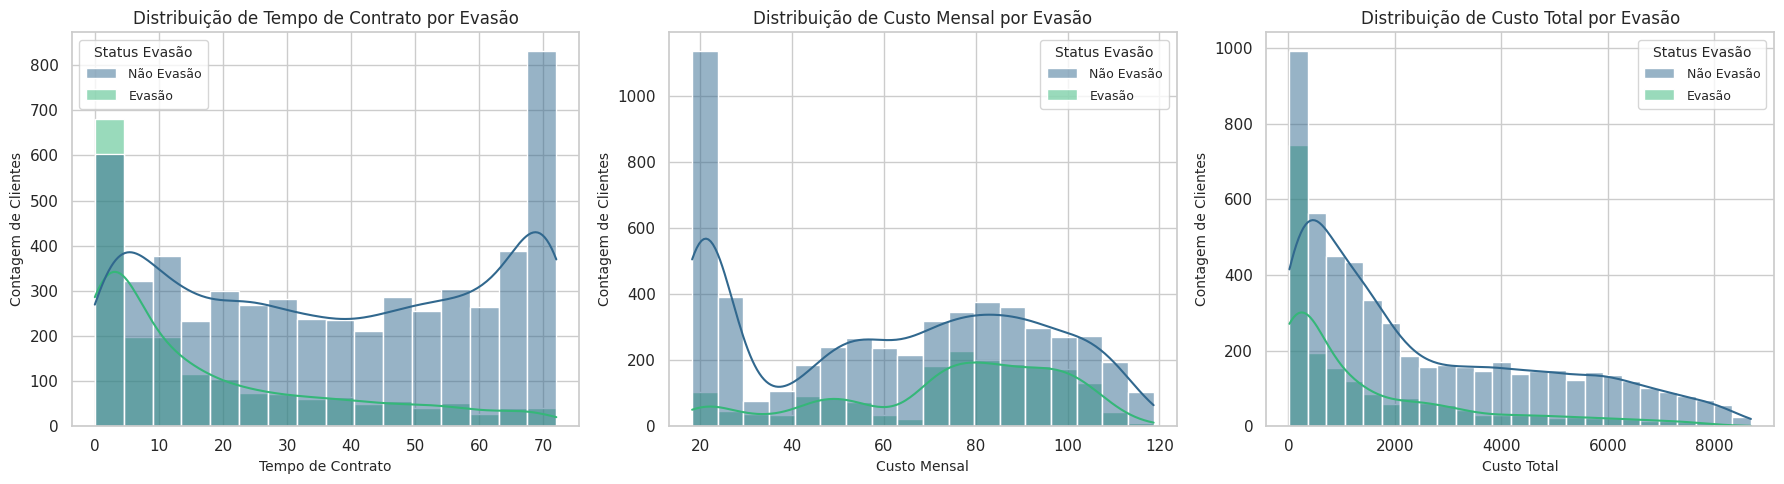

In [131]:



# Lista das variáveis numéricas para análise
variaveis_numericas = ["Tempo_de_Contrato", "Custo_Mensal", "Custo_Total"]

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 100

# --- Criar a figura e os eixos para os subplots ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
#--------------------------------------------------

# Iterar pelas variáveis e pelos eixos dos subplots
for i, var in enumerate(variaveis_numericas):

    # --- Desenhar no subplot correto usando ax=axes[i] ---
    sns.histplot(data=df_clientes, x=var, hue="Evasao", kde=True,
                 common_norm=False, palette="viridis", ax=axes[i])
    #------------------------------------------------------

    # Títulos e rótulos para cada subplot
    axes[i].set_title(f"Distribuição de {var.replace('_', ' ')} por Evasão", fontsize=12)
    axes[i].set_xlabel(f"{var.replace('_', ' ')}", fontsize=10)
    axes[i].set_ylabel("Contagem de Clientes", fontsize=10)

    # --- Modificar textos da legenda existente ---
    try:
        # Obter o objeto legenda do eixo atual
        legend = axes[i].get_legend()
        if legend:
            # Obter os textos atuais da legenda
            texts = legend.get_texts()
            # Modificar os textos (assumindo que a ordem é 0, depois 1)
            if len(texts) >= 2:
                # Comparar como string para segurança
                if texts[0].get_text() == '0':
                    texts[0].set_text('Não Evasão')
                if texts[1].get_text() == '1':
                    texts[1].set_text('Evasão')
            # Definir o título da legenda
            legend.set_title("Status Evasão")
            # Ajustar tamanho da fonte se necessário
            plt.setp(legend.get_texts(), fontsize='9')
            plt.setp(legend.get_title(), fontsize='10')
        else:
            print(f"Aviso: Legenda não encontrada para {var}.")
    except Exception as e:
        print(f"Erro ao modificar legenda para {var}: {e}")
    #---------------------------------------------

# Ajustar o layout geral para evitar sobreposições
plt.tight_layout()

# Mostrar a figura completa com os 3 subplots
plt.show()

Coluna Evasao convertida para int (0/1).


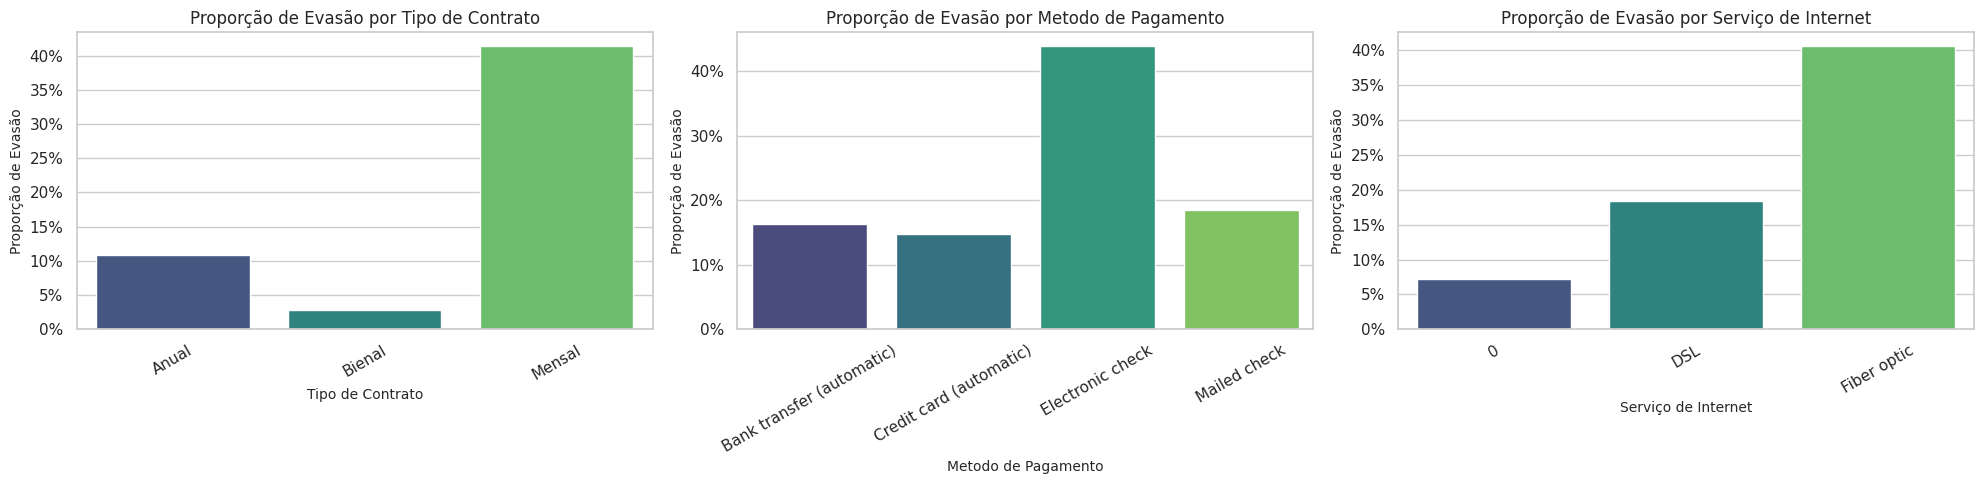

In [132]:

# Garantir que Evasao seja numérica (0 ou 1) para calcular a média (proporção)
try:
    # Tenta converter direto, caso já seja 0/1 ou categoria 0/1
    df_clientes["Evasao_num"] = df_clientes["Evasao"].astype(int)
    print("Coluna Evasao convertida para int (0/1).")
except ValueError:
    # Se falhar, tenta mapear de texto (ex: 'Não'/'Sim')
    # Verifique se as categorias são exatamente 'Não' e 'Sim'
    if all(cat in df_clientes["Evasao"].cat.categories for cat in ['Não', 'Sim']):
         df_clientes["Evasao_num"] = df_clientes["Evasao"].map({'Não': 0, 'Sim': 1})
         print("Coluna Evasao mapeada de Não/Sim para int (0/1).")
    else:
         print("Erro: Não foi possível converter Evasao para numérico (0/1) para cálculo da proporção.")
         # Você pode querer parar a execução aqui ou tratar o erro de outra forma
         # raise TypeError("Coluna Evasao não está no formato esperado para conversão.")

# Lista das variáveis categóricas para análise
variaveis_categoricas = ["Tipo_de_Contrato", "Metodo_de_Pagamento", "Serviço_de_Internet"]

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 100

# --- Criar a figura e os eixos para os subplots (1 linha, 3 colunas) ---
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
#-----------------------------------------------------------------------

# Iterar pelas variáveis e pelos eixos dos subplots
if 'Evasao_num' in df_clientes: # Prosseguir apenas se a conversão foi bem-sucedida
    for i, var in enumerate(variaveis_categoricas):

        # Calcular a proporção de evasão para cada categoria da variável atual
        proporcao_evasao = df_clientes.groupby(var)["Evasao_num"].mean().reset_index()

        # --- Desenhar o barplot da proporção no subplot correto ---
        sns.barplot(data=proporcao_evasao, x=var, y="Evasao_num", palette="viridis", ax=axes[i])
        #-------------------------------------------------------------

        # Títulos e rótulos para cada subplot (CORRIGIDO)
        axes[i].set_title(f"Proporção de Evasão por {var.replace('_', ' ')}", fontsize=12)
        axes[i].set_xlabel(f"{var.replace('_', ' ')}", fontsize=10)
        axes[i].set_ylabel("Proporção de Evasão", fontsize=10)
        # Formatar o eixo Y como porcentagem (CORRIGIDO)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
        # Rotacionar rótulos do eixo X se forem muitos (CORRIGIDO)
        axes[i].tick_params(axis='x', rotation=30)

    # Remover a coluna temporária se desejar
    # del df_clientes['Evasao_num']

    # Ajustar o layout geral para evitar sobreposições
    plt.tight_layout()

    # Mostrar a figura completa com os 3 subplots
    plt.show()
else:
    print("Geração de gráficos de proporção cancelada devido a erro na conversão da coluna Evasao.")

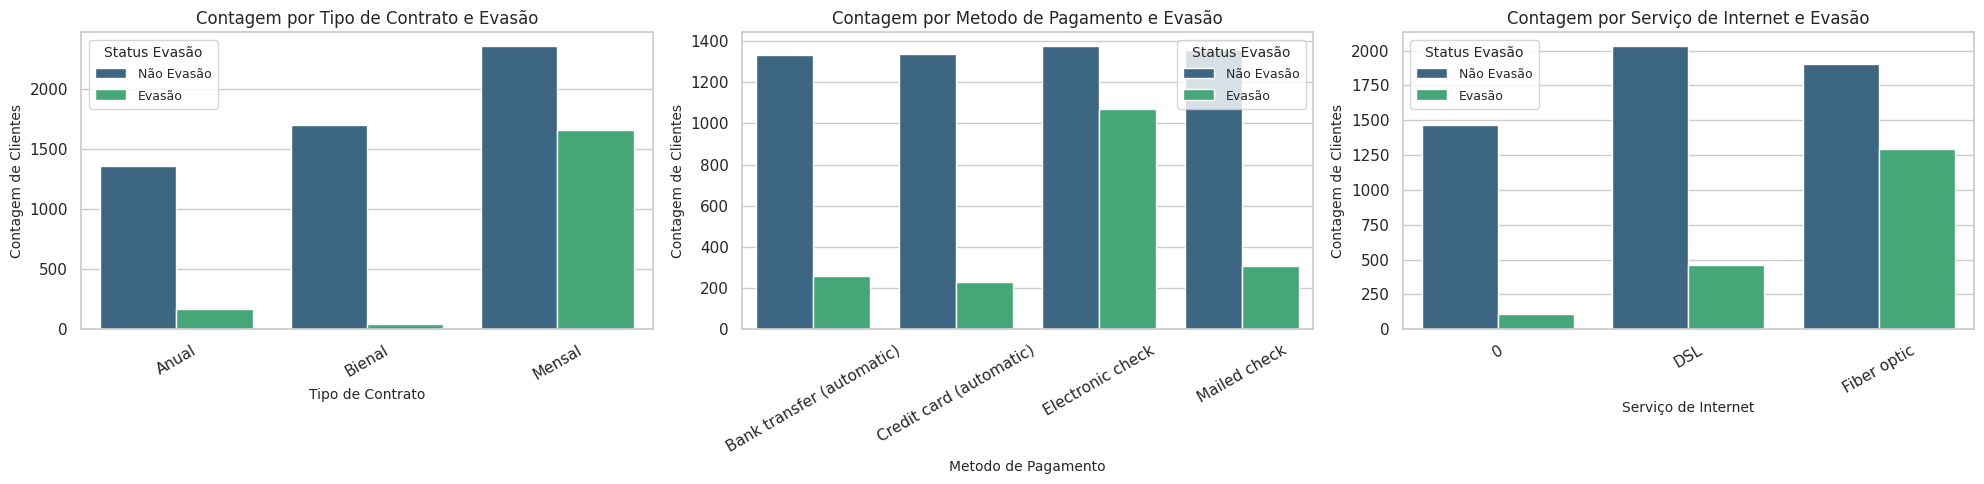

In [133]:

# Lista das variáveis categóricas para análise
variaveis_categoricas = ["Tipo_de_Contrato", "Metodo_de_Pagamento", "Serviço_de_Internet"]

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 100

# Criar a figura e os eixos para os subplots (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(20, 5)) # Ajustado para layout horizontal
#-----------------------------------------------------------------------

# Iterar pelas variáveis e pelos eixos dos subplots
for i, var in enumerate(variaveis_categoricas):

    # Desenhar o countplot no subplot correto usando ax=axes[i]

    sns.countplot(data=df_clientes, x=var, hue="Evasao", palette="viridis", ax=axes[i])

    # Títulos e rótulos para cada subplot
    axes[i].set_title(f"Contagem por {var.replace('_', ' ')} e Evasão", fontsize=12)
    axes[i].set_xlabel(f"{var.replace('_', ' ')}", fontsize=10)
    axes[i].set_ylabel("Contagem de Clientes", fontsize=10)
    # Rotacionar rótulos do eixo X se forem muitos
    axes[i].tick_params(axis='x', rotation=30)

    #  Modificar textos da legenda existente
    try:
        legend = axes[i].get_legend()
        if legend:
            texts = legend.get_texts()
            if len(texts) >= 2:
                if texts[0].get_text() in ['0']:
                    texts[0].set_text('Não Evasão')
                if texts[1].get_text() in ['1']:
                    texts[1].set_text('Evasão')
            legend.set_title("Status Evasão")
            plt.setp(legend.get_texts(), fontsize='9')
            plt.setp(legend.get_title(), fontsize='10')
        else:
            pass
    except Exception as e:
        pass
# Ajustar o layout geral para evitar sobreposições
plt.tight_layout()

# Mostrar a figura completa com os 3 subplots
plt.show()



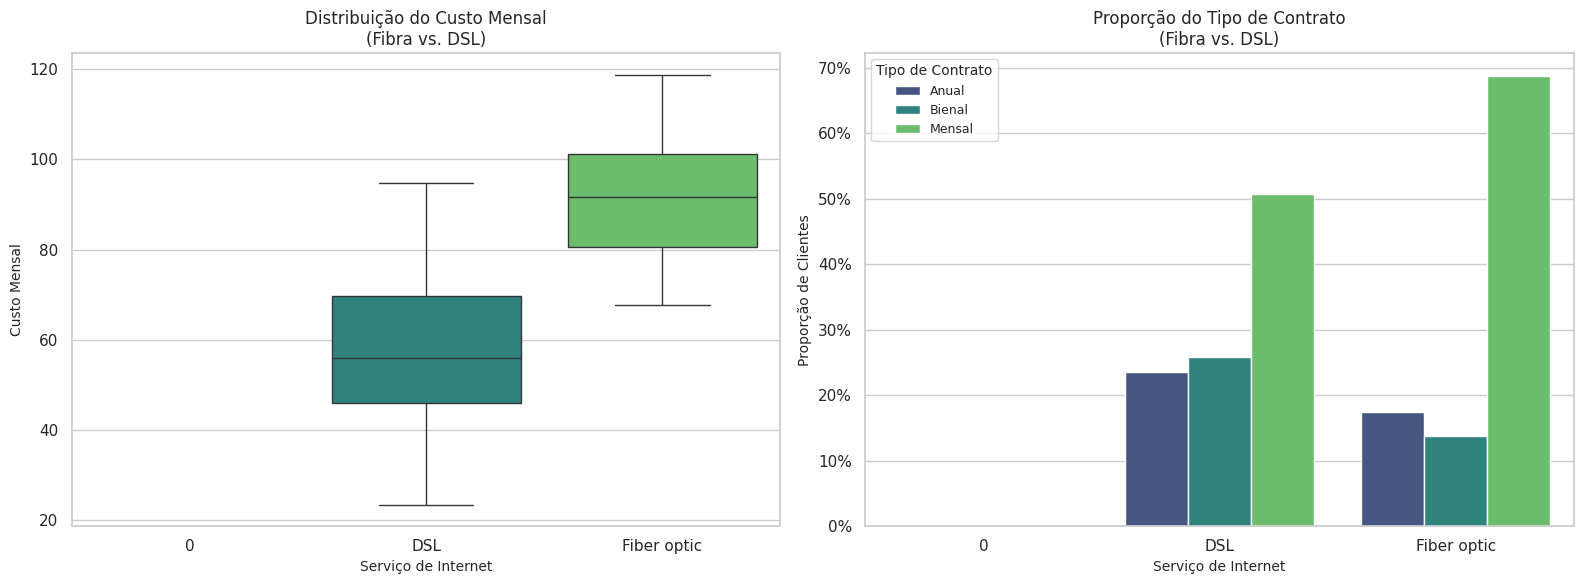

In [134]:


# Filtrar para incluir apenas clientes com DSL ou Fibra Óptica
df_internet = df_clientes[df_clientes["Serviço_de_Internet"].isin(["DSL", "Fiber optic"])].copy()

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 100

#Criar a figura e os eixos para os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Gráfico 1: Boxplot do Custo Mensal por Serviço de Internet
sns.boxplot(data=df_internet, x="Serviço_de_Internet", y="Custo_Mensal", palette="viridis", ax=axes[0])
axes[0].set_title("Distribuição do Custo Mensal\n(Fibra vs. DSL)", fontsize=12)
axes[0].set_xlabel("Serviço de Internet", fontsize=10)
axes[0].set_ylabel("Custo Mensal", fontsize=10)
#--------------------------------------------------------------------

#  Gráfico 2: Proporção do Tipo de Contrato por Serviço de Internet ---
# Calcular a proporção de Tipo_de_Contrato
prop_contrato = (
    df_internet.groupby("Serviço_de_Internet")["Tipo_de_Contrato"]
    .value_counts(normalize=True)
    .rename("Proporção")
    .reset_index()
)

# Desenhar o barplot das proporções
sns.barplot(data=prop_contrato, x="Serviço_de_Internet", y="Proporção",
            hue="Tipo_de_Contrato", palette="viridis", ax=axes[1])
axes[1].set_title("Proporção do Tipo de Contrato\n(Fibra vs. DSL)", fontsize=12)
axes[1].set_xlabel("Serviço de Internet", fontsize=10)
axes[1].set_ylabel("Proporção de Clientes", fontsize=10)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}')) # Formatar eixo Y como %
axes[1].legend(title="Tipo de Contrato", fontsize=9, title_fontsize=10)
#---------------------------------------------------------------------------

# Ajustar o layout geral para evitar sobreposições
plt.tight_layout()

# Mostrar a figura completa com os 2 subplots
plt.show()



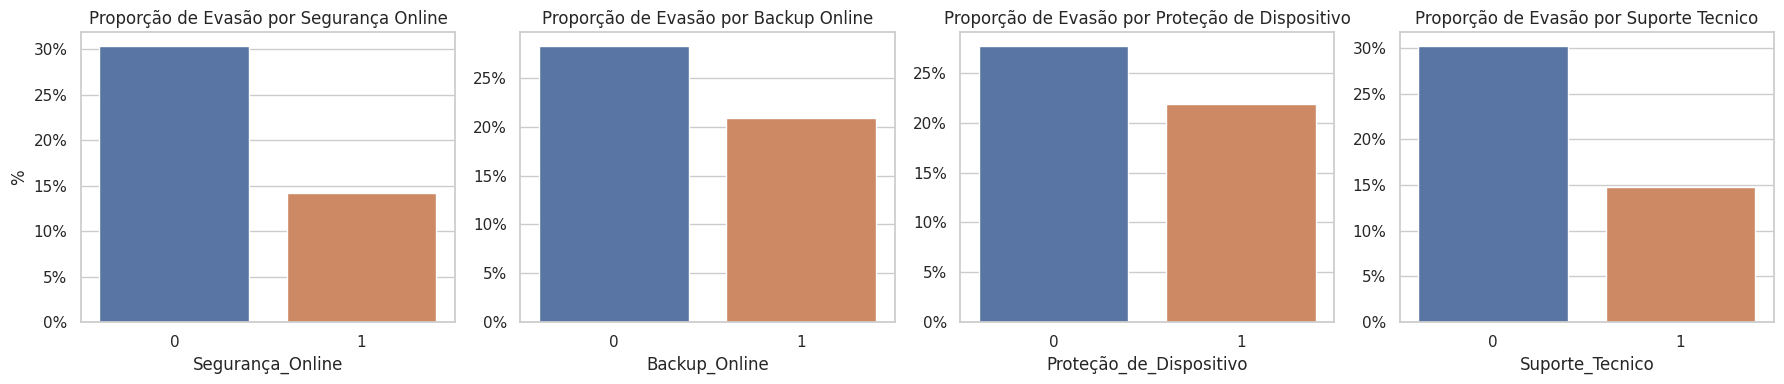

In [135]:
# Visualização sem avisos de depreciação
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suprimir avisos de depreciação
warnings.filterwarnings("ignore", category=FutureWarning)

# Configuração rápida
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Variáveis e geração de gráficos em um loop
servicos = ["Segurança_Online", "Backup_Online", "Proteção_de_Dispositivo", "Suporte_Tecnico"]
for i, var in enumerate(servicos):
    # Usar observed=True para evitar o aviso do groupby
    prop = df_clientes.groupby(var, observed=True)['Evasao_num'].mean().reset_index()

    # Usar hue=var e legend=False para evitar o aviso do barplot
    sns.barplot(data=prop, x=var, y='Evasao_num', hue=var, legend=False, ax=axes[i])

    # Formatação mínima necessária
    axes[i].set_title(f"Proporção de Evasão por {var.replace('_', ' ')}")
    axes[i].set_ylabel("%" if i==0 else "")
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()
plt.show()


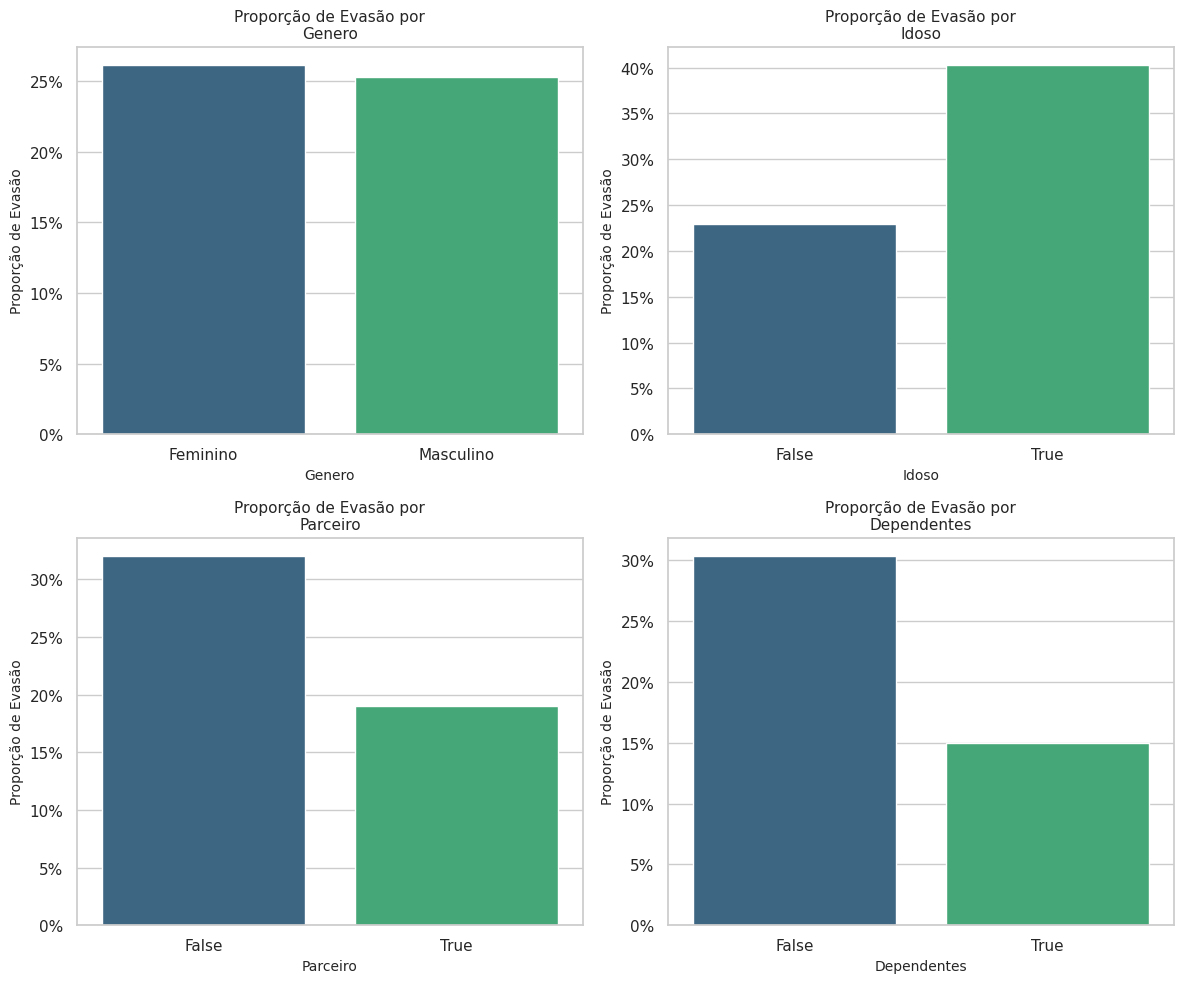

In [136]:
# Lista das variáveis demográficas para análise
variaveis_demograficas = [
    "Genero",
    "Idoso",
    "Parceiro",
    "Dependentes"
]

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 100

# --- Criar a figura e os eixos para os subplots (2 linhas, 2 colunas) ---
# Ajustar figsize conforme necessário
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Achatar os eixos para facilitar a iteração
axes = axes.flatten()
#-----------------------------------------------------------------------

# Iterar pelas variáveis e pelos eixos dos subplots
if 'Evasao_num' in df_clientes: # Usar a cópia onde Evasao_num foi criada
    for i, var in enumerate(variaveis_demograficas):

        # Calcular a proporção de evasão para cada categoria da variável atual
        # Agrupar por \'var\', calcular a média de \'Evasao_num\'
        # Tratar booleanos como strings para agrupamento claro
        if df_clientes[var].dtype == 'bool':
            df_clientes[var] = df_clientes[var].astype(str)

        proporcao_evasao = df_clientes.groupby(var)['Evasao_num'].mean().reset_index()

        # --- Desenhar o barplot da proporção no subplot correto ---
        sns.barplot(data=proporcao_evasao, x=var, y='Evasao_num', palette="viridis", ax=axes[i])
        #-------------------------------------------------------------

        # Títulos e rótulos para cada subplot
        axes[i].set_title(f"Proporção de Evasão por\n{var.replace('_', ' ')}", fontsize=11)
        axes[i].set_xlabel(f"{var.replace('_', ' ')}", fontsize=10)
        axes[i].set_ylabel("Proporção de Evasão", fontsize=10)
        # Formatar o eixo Y como porcentagem
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
        # Rotacionar rótulos do eixo X se necessário
        # axes[i].tick_params(axis='x', rotation=15)

    # Ajustar o layout geral para evitar sobreposições
    plt.tight_layout()

    # Mostrar a figura completa com os 4 subplots
    plt.show()
else:
    print("Geração de gráficos cancelada. Coluna 'Evasao_num' não encontrada na cópia do DataFrame.")



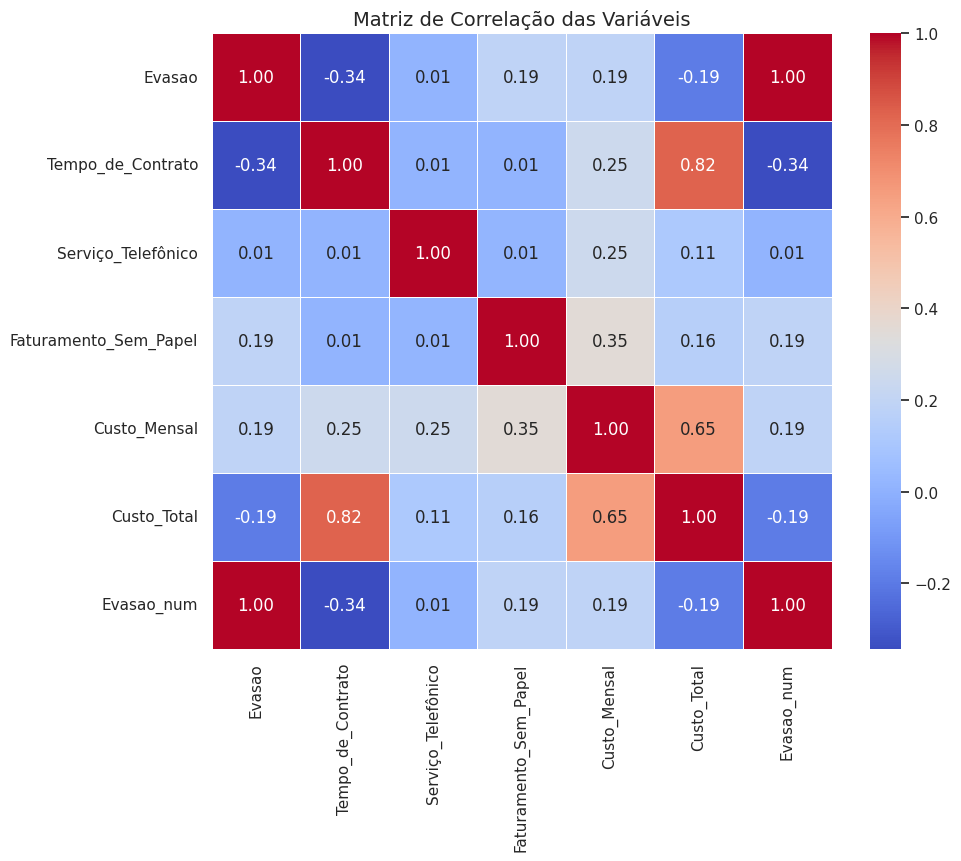


Correlações com a variável Evasao:
Evasao                   1.000000
Evasao_num               1.000000
Custo_Mensal             0.189866
Faturamento_Sem_Papel    0.186666
Serviço_Telefônico       0.012571
Custo_Total             -0.194389
Tempo_de_Contrato       -0.344079
Name: Evasao, dtype: float64


In [137]:
# 1. Calcular a Matriz de Correlação
correlation_matrix = df_clientes.corr(numeric_only=True) # Use df_clientes and calculate correlation for numeric columns only

# 2. Visualizar a Matriz de Correlação com Seaborn Heatmap
plt.figure(figsize=(10, 8)) # Ajuste o tamanho se necessário
sns.heatmap(
    correlation_matrix,
    annot=True,        # Mostrar os valores de correlação nas células
    cmap='coolwarm',   # Esquema de cores (pode escolher outros: viridis, plasma, etc.)
    fmt=".2f",         # Formatar os números com 2 casas decimais
    linewidths=.5      # Adicionar linhas entre as células (opcional)
)
plt.title("Matriz de Correlação das Variáveis", fontsize=14)
plt.show()

# 3. (Opcional) Exibir as correlações específicas com a variável 'Evasao'
print("\nCorrelações com a variável Evasao:")
print(correlation_matrix["Evasao"].sort_values(ascending=False))